# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [53]:
# Checking the number of mice.
len(mouse_study["Mouse ID"].unique())

249

In [54]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates = mouse_study[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_id = duplicates["Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [55]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_study[mouse_study["Mouse ID"] == duplicate_mouse_id[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [56]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study = mouse_study.loc[mouse_study["Mouse ID"] != duplicate_mouse_id[0]]
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [57]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study["Mouse ID"].unique())

248

## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

In [59]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    ('Mean Tumor Volume', 'mean'),
    ('Median Tumor Volume', 'median'),
    ('Tumor Volume Variance', 'var'),
    ('Tumor Volume Std. Dev.', 'std'),
    ('Tumor Volume Std. Err.', 'sem')
])
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

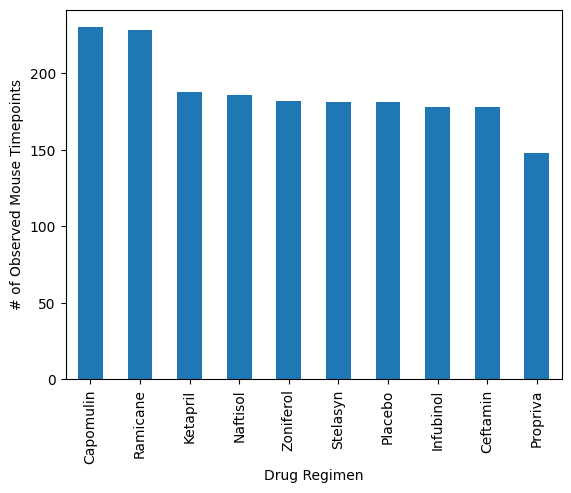

In [60]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows = mouse_study['Drug Regimen'].value_counts()
bar_plot = total_rows.plot(kind="bar")
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("# of Observed Mouse Timepoints")

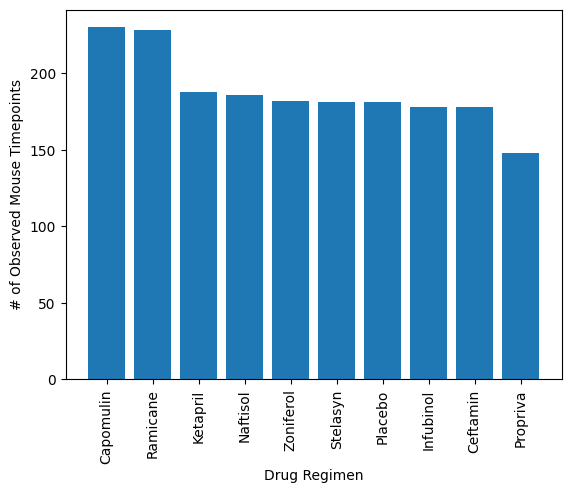

In [61]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(total_rows.index, total_rows.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation= "vertical")
plt.show()

<Axes: ylabel='count'>

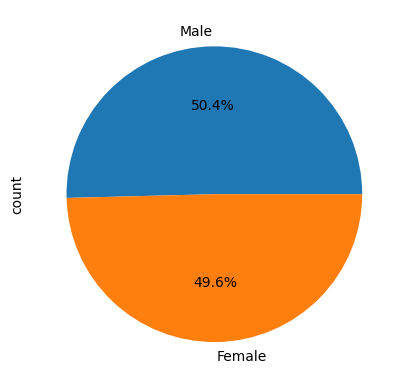

In [62]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
total_rows = mouse_study[["Mouse ID", "Sex"]].drop_duplicates()
total_rows = total_rows["Sex"].value_counts()
# Make the pie chart
total_rows.plot(kind= "pie", autopct="%1.1f%%")

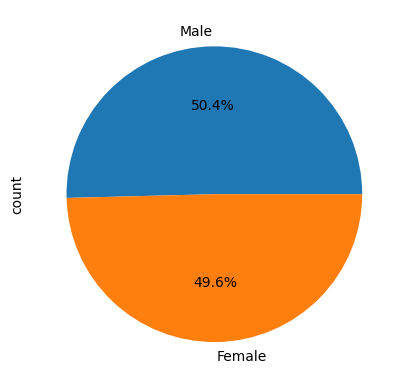

In [63]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
total_rows = mouse_study[["Mouse ID", "Sex"]].drop_duplicates()
total_rows = total_rows["Sex"].value_counts()

# Make the pie chart
plt.pie(total_rows,
        autopct="%1.1f%%",
        labels=["Male", "Female"]
        )
plt.ylabel('count')

plt.show()

## Quartiles, Outliers and Boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = mouse_study.groupby('Mouse ID').agg({
    'Timepoint': 'max',
    'Sex': 'first'
}).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_study = pd.merge(mouse_study, timepoint_df, how="right", on=["Mouse ID", "Timepoint"])
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex_x,Age_months,Weight (g),Sex_y
0,a203,45,67.973419,2,Infubinol,Female,20,23,Female
1,a251,45,65.525743,1,Infubinol,Female,21,25,Female
2,a262,45,70.717621,4,Placebo,Female,17,29,Female
3,a275,45,62.999356,3,Ceftamin,Female,20,28,Female
4,a366,30,63.440686,1,Stelasyn,Female,16,29,Female
...,...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26,Female
244,z578,45,30.638696,0,Ramicane,Male,11,16,Male
245,z581,45,62.754451,3,Infubinol,Female,24,25,Female
246,z795,45,65.741070,3,Naftisol,Female,13,29,Female


In [65]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    # add subset
        subset = mouse_study[mouse_study["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    # Determine outliers using upper and lower bounds
        quartiles = subset.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5 * iqr)
        upper_bound = upperq + (1.5 * iqr)

        outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
        vol_data.append(subset)
        print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


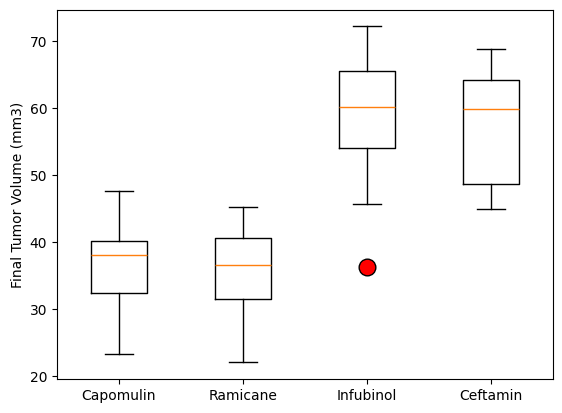

In [66]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
box_plot = plt.boxplot(vol_data,
                      tick_labels=treatments,
                      flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 12})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

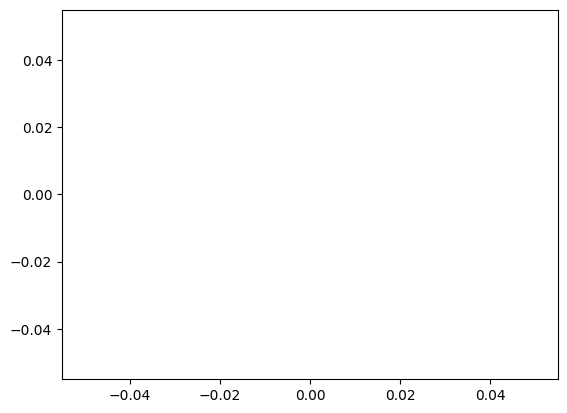

In [67]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin



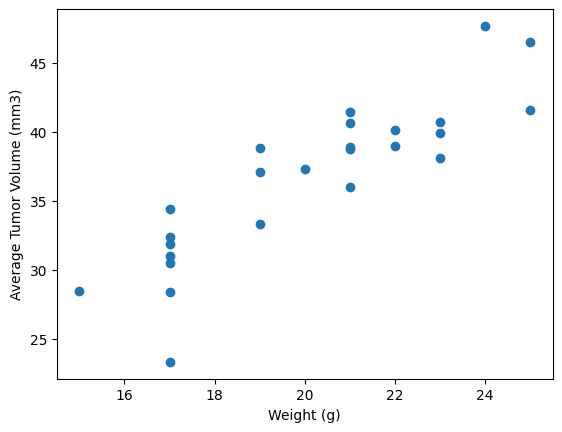

In [70]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = mouse_study[mouse_study["Drug Regimen"] == "Capomulin"]

# Calculate average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].sum()

# Create scatter plot
plt.scatter(mouse_weights, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [109]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
